### Guided Project: Clean and Analyze Employee Exit Surveys
* The project works with surveys from employees ofthe Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.
* Aim of the project is to find the knowledge:
    * Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfication? What about employees who have been there longer?
    * Are younger employees resigning due to some kind of dissatisfication? What about older employees?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')


Obervatons:
* 1. dete data contains 822 entries and 56 columns, some column names contain special char, line 'Maternity/family', 'Study/Travel', also several columns contains more than half null values, line column Aboriginal, South Sea, most of the data type is object except ID. dete contains 'Not Stated' values that indicate values are missing, but not represented as NaN
* 2. tafe data contains 702 entries and 72 columns, also lots of null values inside, besides, some column names are too long and not convenient for data analysis, also some duplicate columns

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [4]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

* Drop some columns from each dataframe that won't be used in the analysis

In [5]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower(
).str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
tafe_survey_updated.rename(columns={'Record ID': 'id', 
                                   'CESSATION YEAR': 'cease_date',
                                   'Reason for ceasing employment': 'separationtype',
                                   'Gender. What is your Gender?': 'gender',
                                   'CurrentAge. Current Age': 'age',
                                   'Employment Type. Employment Type': 'employment_status',
                                   'Classification. Classification': 'position',
                                   'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                   'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},
                          inplace = True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

* Modify column names of dete and tafe

In [10]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


* Question: Are employees who have only worked for the institutes for a short period time resigning due to some kind of dissatisfication? What about employees who have been at the job longer?
* From separationtype, we only care about resignation, separate rows of this

In [12]:
dete_survey_updated.separationtype.value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
tafe_survey_updated.separationtype.value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [14]:
# Use the DataFrame.copy() method on the result to avoid the SettingWithCopy
# Warning
#tafe_survey_updated.separationtype.astype(str, inplace = True)
dete_resignations = dete_survey_updated[dete_survey_updated.separationtype.str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated.separationtype.str.contains('Resignation', na=False)].copy()
# How to traet na values, na=False!!!
dete_resignations.separationtype.value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [15]:
tafe_resignations.separationtype.value_counts(dropna = False)

Resignation    340
Name: separationtype, dtype: int64

In [16]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated.separationtype.str.contains('Resignation') == True].copy()
tafe_resignations.separationtype.value_counts()

Resignation    340
Name: separationtype, dtype: int64

* Verify the years in the cease_date and dete_start_date, in theory, cease date should after dete_start_date, also no sense have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [17]:
dete_resignations.cease_date.value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [18]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [19]:
dete_resignations.cease_date = dete_resignations.cease_date.str.extract(r'([12][0-9]{3})').astype(float)
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [20]:
dete_resignations.cease_date.value_counts(dropna=False).sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
NaN        11
Name: cease_date, dtype: int64

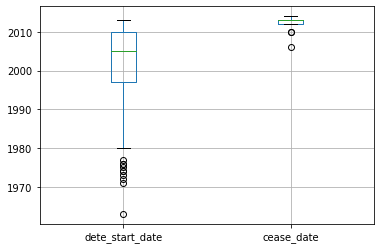

In [21]:
dete_resignations.dete_start_date.value_counts(dropna=False).sort_index(ascending = False)
dete_resignations.boxplot(['dete_start_date', 'cease_date'])
#plot the values of any numeric columns with a boxplot to identify any values that look wrong.

In [22]:
tafe_resignations.cease_date.value_counts(dropna= False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64

In [23]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

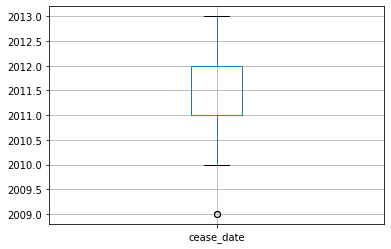

In [24]:
tafe_resignations.boxplot('cease_date')
#?????????????????????????????????????????//

In [25]:
tafe_resignations.cease_date.value_counts(dropna=False).sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: cease_date, dtype: int64

In [26]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


* 1. There aren't any major issues with the years
* 2. The years in each dataframe don't span quite the same number of years. 
* Create a new column for dete_resignations for period of time, the length of time an employee spent in a workplace is referred to as their years of service.

In [27]:
dete_resignations['institute_service'] = dete_resignations.cease_date - dete_resignations.dete_start_date

In [28]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [29]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [30]:
dete_resignations.job_dissatisfaction.value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [31]:
dete_resignations.physical_work_environment.value_counts()

False    305
True       6
Name: physical_work_environment, dtype: int64

In [32]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [33]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [34]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [35]:
#update those tow columns, '-' to False, real value to True
def update_vals(value):
    if pd.isna(value):
        return np.nan
    if value == '-':
        return False
    return True
tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
#tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)
# Is there any better solution?

In [36]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [37]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [38]:
dete_satisfycolumns = ['job_dissatisfaction','dissatisfaction_with_the_department',
                      'physical_work_environment', 'lack_of_recognition',
                      'lack_of_job_security', 'work_location','employment_conditions',
                      'work_life_balance','workload']
tafe_satisfycolumns = ['Contributing Factors. Dissatisfaction',
                      'Contributing Factors. Job Dissatisfaction']
dete_resignations['dissatisfied'] = dete_resignations[dete_satisfycolumns].any(axis = 'columns',
                                                                              skipna=False)
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_satisfycolumns].any(axis = 1,
                                                                              skipna=False)

In [39]:
dete_resignations.dissatisfied.value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [40]:
tafe_resignations.dissatisfied.value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [41]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

* Make a new column dissatisfied for both dete and tafe data, if any values from job dissatisfication columns is True, this will be True

In [42]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


In [43]:
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [44]:
dete_resignations_up.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied'],
      dtype='object')

In [45]:
tafe_resignations_up.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

* To aggregate the data according to the institute_service column.
* First we combine the data

In [46]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [47]:
combined.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied',
       'institute', 'Institute', 'WorkArea',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       

In [48]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

* Drop any non-needed columns in which less than 500 non null values

In [49]:
combined_updated = combined.dropna(thresh=500, axis = 1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


In [50]:
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


In [51]:
combined_updated.institute_service.value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
36.0                   2
30.0                   2
26.0                   2
28.0                   2
25.0                   2


* Category the employees according to the length of institute_service
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [52]:
# First extract years from institute_servcie
#combined_updated['service_years'] = combined_updated.institute_service.
combined_updated['service_years'] = combined_updated.institute_service.astype(str).str.extract(
    r'([0-9][0-9]?)').astype(float)

/home/ning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
#combined_updated.institute_service.astype(str).str.extractall()
combined_updated.service_years.value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: service_years, dtype: int64

In [54]:
def category(val):
    if pd.isna(val):
        return np.nan
    if val < 3:
        return 'New'
    if val <=6:
        return 'Experienced'
    if val <=10:
        return 'Established'
    return 'Veteran'
combined_updated['service_cat'] = combined_updated.service_years.apply(category)
combined_updated.service_cat.value_counts(dropna=False)

/home/ning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

* Make a new column which is category of employees, 
    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company


In [55]:
combined_updated.dissatisfied.value_counts(dropna= False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [56]:
combined_updated.dissatisfied.fillna(False, inplace=True)
combined_updated.dissatisfied.value_counts(dropna=False)

/home/ning/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


False    411
True     240
Name: dissatisfied, dtype: int64

* na value of column dissatisfied is filled with False since False occurs most frequently in this column.

In [57]:
pivot_dissatisfy = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
pivot_dissatisfy = pivot_dissatisfy.reindex(index = ['New', 'Experienced', 'Established',
                                                    'Veteran'])
pivot_dissatisfy

,dissatisfied
service_cat,
New,0.295337
Experienced,0.343023
Established,0.516129
Veteran,0.485294


* Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees. 
* The default aggregation function is the mean

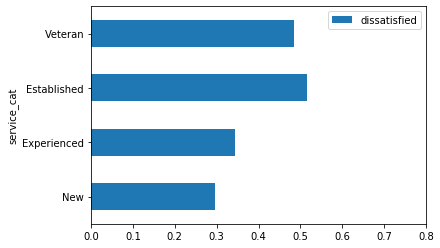

In [58]:
pivot_dissatisfy.plot(kind = 'barh', xlim = (0,0.8))

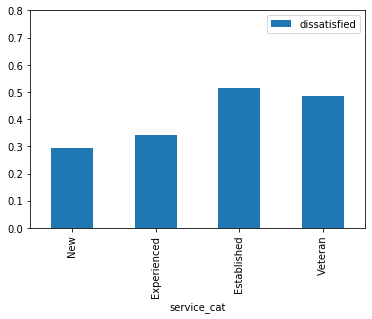

In [59]:
pivot_dissatisfy.plot(kind = 'bar', ylim=(0,0.8))

* For the employee who designated from their job, ~1/3 of the new (1-3 years) and experienced employeed (3-6years) designate because of distisfying of the job or other factors, almost half of the established (7-10years) and veteran (more than 10 years) employed designated because they do not satisfy some factors.

In this guided project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization (and not even the final one), we completed the following tasks:

    Explored the data and figured out how to prepare it for analysis
    Corrected some of the missing values
    Dropped any data not needed for our analysis
    Renamed our columns
    Verified the quality of our data
    Created a new institute_service column
    Cleaned the Contributing Factors columns
    Created a new column indicating if an employee resigned because they were dissatisfied in some way
    Combined the data
    Cleaned the institute_service column
    Handled the missing values in the dissatisfied column
    Aggregated the data

Our work here is far from done! We recommend that you continue with the following steps:

    Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
    Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
    Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?
    Format your project using Dataquest's project style guide.

Looking for feedback on your project? Or maybe you'd like to show it off? Head over to our Community to share your finished Guided Project! You can also view your peers' completed notebooks to see how they approached the project.

Guided projects can be used to build a portfolio to showcase to potential employers, so we really encourage you to keep working on this. You're welcome to keep working on the project here, but we recommend downloading it to your computer using the download icon above and working on it there.

Remember - if you get stuck, don't be afraid to review previous missions or use Google and StackOverflow to search for answers. This isn't easy and will take time and practice.

Congratulations on completing the course! We hope you learned a lot.

In [60]:
combined_updated.age.value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [61]:
combined_updated.dissatisfied.value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [62]:
combined_updated['age_clean'] = combined_updated.age.str.extract(r'([0-9]{2})').astype(float)

/home/ning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
combined_updated.age_clean

3      36.0
5      41.0
8      31.0
9      46.0
11     31.0
       ... 
696    21.0
697    51.0
698     NaN
699    51.0
701    26.0
Name: age_clean, Length: 651, dtype: float64

In [64]:
def age_category(age):
    if pd.isna(age):
        return np.nan
    if age <= 20:
        return '0-20'
    if age <= 30:
        return '21-30'
    if age <= 40:
        return '31-40'
    if age <= 50:
        return '41-50'
    if age <= 60:
        return '51-60'
    return '60-'
combined_updated['age_category'] = combined_updated.age_clean.apply(age_category)


/home/ning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [65]:
combined_updated.age_category.value_counts(dropna = False)

41-50    174
31-40    134
21-30    129
51-60    126
NaN       55
60-       23
0-20      10
Name: age_category, dtype: int64

In [66]:
age_pivot = combined_updated.pivot_table(index = 'age_category', values = 'dissatisfied')
age_pivot

,dissatisfied
age_category,
0-20,0.200000
21-30,0.364341
31-40,0.358209
41-50,0.379310
51-60,0.404762
60-,0.521739


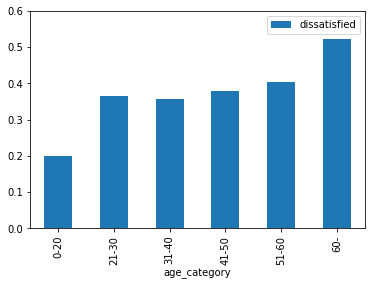

In [68]:
age_pivot.plot(kind = 'bar', ylim = (0,0.6))

* ~20% of young employee (age <=20) who designated because they dissatisfied something

In [70]:
combined_updated.age_category

3      31-40
5      41-50
8      31-40
9      41-50
11     31-40
       ...  
696    21-30
697    51-60
698      NaN
699    51-60
701    21-30
Name: age_category, Length: 651, dtype: object

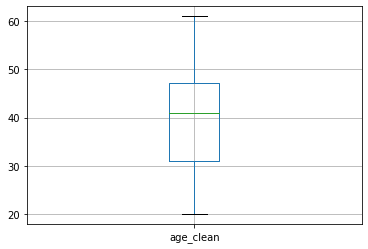

In [74]:
combined_updated.boxplot('age_clean')

In [78]:
combined_updated.age_category.value_counts()

41-50    174
31-40    134
21-30    129
51-60    126
60-       23
0-20      10
Name: age_category, dtype: int64

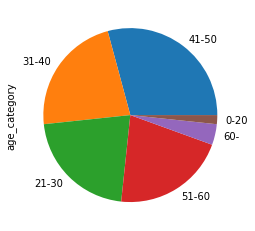

In [82]:
combined_updated.age_category.value_counts().plot(kind = 'pie')